### Thera Bank Personal Loan Campaign <font color="red">Submitted By: Mayur Makadia</font>

**Github: https://github.com/mayurmakadia1/UTAustin-PGP-AIML/tree/master/2-Supervised-Learning**

Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.
Domain:
Banking
Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.
Attribute Information:
* ID: Customer ID
* Age: Customer's age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer \$000
* ZIP Code: Home Address ZIP code.
* Family: Family size of the customer
* CCAvg: Avg. spending on credit cards per month \$000
* Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage: Value of house mortgage if any. \$000
* Personal Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Does the customer use internet banking facilities?
* Credit card: Does the customer use a credit card issued by the bank?

Learning Outcomes:
* Exploratory Data Analysis
* Preparing the data to train a model
* Training and making predictions using a classification model
* Model evaluation

Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

## Task 1 - Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.

In [1669]:
warnings.filterwarnings('ignore')

In [1670]:
#Load the libraries required
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns

## Load and review data

In [1671]:
#read the dataset
bdata = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [1672]:
#check the information about loaded dataset
bdata.shape # Check number of columns and rows in data frame

(5000, 14)

In [1673]:
#quick data review
bdata.head() # To check first 5 rows of data set

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [1674]:
#Fix column names to remove spaces and make them all lower cases
bdata.columns = bdata.columns.str.strip().str.lower().str.replace(' ', '_')

In [1675]:
#check column names to make sure they are changed as expected
bdata.head() # To check first 5 rows of data set

,id,age,experience,income,zip_code,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [1676]:
#review data types for columns
print('===============================================================')
print('Data Types:')
print('===============================================================')
print(bdata.info())

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   experience          5000 non-null   int64  
 3   income              5000 non-null   int64  
 4   zip_code            5000 non-null   int64  
 5   family              5000 non-null   int64  
 6   ccavg               5000 non-null   float64
 7   education           5000 non-null   int64  
 8   mortgage            5000 non-null   int64  
 9   personal_loan       5000 non-null   int64  
 10  securities_account  5000 non-null   int64  
 11  cd_account          5000 non-null   int64  
 12  online              5000 non-null   int64  
 13  creditcard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


In [1677]:
print('===============================================================')
print('Shape:')
print('===============================================================')
print(bdata.shape)

Shape:
(5000, 14)


In [1678]:
print('===============================================================')
print('Statistical Summary:')
print('===============================================================')
print(bdata.describe().transpose())

Statistical Summary:
                     count          mean          std     min       25%  \
id                  5000.0   2500.500000  1443.520003     1.0   1250.75   
age                 5000.0     45.338400    11.463166    23.0     35.00   
experience          5000.0     20.104600    11.467954    -3.0     10.00   
income              5000.0     73.774200    46.033729     8.0     39.00   
zip_code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
family              5000.0      2.396400     1.147663     1.0      1.00   
ccavg               5000.0      1.937938     1.747659     0.0      0.70   
education           5000.0      1.881000     0.839869     1.0      1.00   
mortgage            5000.0     56.498800   101.713802     0.0      0.00   
personal_loan       5000.0      0.096000     0.294621     0.0      0.00   
securities_account  5000.0      0.104400     0.305809     0.0      0.00   
cd_account          5000.0      0.060400     0.238250     0.0      0.00   
onli

In [1679]:
print('===============================================================')
print('Null values:')
print('===============================================================')
print(bdata.isnull().sum())

Null values:
id                    0
age                   0
experience            0
income                0
zip_code              0
family                0
ccavg                 0
education             0
mortgage              0
personal_loan         0
securities_account    0
cd_account            0
online                0
creditcard            0
dtype: int64


## Task 2 - EDA: Study the data distribution in each attribute and target variable, share your findings

**Task 2.1 - Number of unique in each column?**

In [1680]:
# Age: Customer's age in completed years - DATA CHECK: SHOULD NOT BE LESS THAN 0
bdata.age.unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23], dtype=int64)

In [1681]:
# Experience: #years of professional experience - DATA CHECK: SHOULD NOT BE LESS THAN 0
bdata.experience.unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

**Seems experience data has issues**, there are negative values (-1,-2,-3) in experience columns. This will be looked at during data preparation before executing logistic regression model

In [1682]:
# Income: Annual income of the customer \$000 - DATA CHECK: SHOULD NOT BE LESS THAN 0
bdata.income.unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218], dtype=int64)

In [1683]:
# ZIP Code: Home Address ZIP code.
bdata.zip_code.unique()

array([91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023,
       94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604,
       94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117,
       94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019,
       95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245,
       95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123,
       90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305,
       95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612,
       95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037,
       95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833,
       94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720,
       90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423,
       93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053,
       90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503,
       93111, 94132,

In [1684]:
# Family: Family size of the customer - SHOULD NOT BE LESS THAN 0
bdata.family.unique()

array([4, 3, 1, 2], dtype=int64)

In [1685]:
# CCAvg: Avg. spending on credit cards per month \$000 - DATA CHECK: SHOULD NOT BE LESS THAN 0
bdata.ccavg.unique()

array([ 1.6 ,  1.5 ,  1.  ,  2.7 ,  0.4 ,  0.3 ,  0.6 ,  8.9 ,  2.4 ,
        0.1 ,  3.8 ,  2.5 ,  2.  ,  4.7 ,  8.1 ,  0.5 ,  0.9 ,  1.2 ,
        0.7 ,  3.9 ,  0.2 ,  2.2 ,  3.3 ,  1.8 ,  2.9 ,  1.4 ,  5.  ,
        2.3 ,  1.1 ,  5.7 ,  4.5 ,  2.1 ,  8.  ,  1.7 ,  0.  ,  2.8 ,
        3.5 ,  4.  ,  2.6 ,  1.3 ,  5.6 ,  5.2 ,  3.  ,  4.6 ,  3.6 ,
        7.2 ,  1.75,  7.4 ,  2.67,  7.5 ,  6.5 ,  7.8 ,  7.9 ,  4.1 ,
        1.9 ,  4.3 ,  6.8 ,  5.1 ,  3.1 ,  0.8 ,  3.7 ,  6.2 ,  0.75,
        2.33,  4.9 ,  0.67,  3.2 ,  5.5 ,  6.9 ,  4.33,  7.3 ,  4.2 ,
        4.4 ,  6.1 ,  6.33,  6.6 ,  5.3 ,  3.4 ,  7.  ,  6.3 ,  8.3 ,
        6.  ,  1.67,  8.6 ,  7.6 ,  6.4 , 10.  ,  5.9 ,  5.4 ,  8.8 ,
        1.33,  9.  ,  6.7 ,  4.25,  6.67,  5.8 ,  4.8 ,  3.25,  5.67,
        8.5 ,  4.75,  4.67,  3.67,  8.2 ,  3.33,  5.33,  9.3 ,  2.75])

In [1686]:
# Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional - SHOULD NOT BE OTHER THAN 1,2,3
bdata.education.unique()

array([1, 2, 3], dtype=int64)

In [1687]:
# Mortgage: Value of house mortgage if any. \$000 - DATA CHECK: SHOULD NOT BE LESS THAN 0
bdata.mortgage.unique()

array([  0, 155, 104, 134, 111, 260, 163, 159,  97, 122, 193, 198, 285,
       412, 153, 211, 207, 240, 455, 112, 336, 132, 118, 174, 126, 236,
       166, 136, 309, 103, 366, 101, 251, 276, 161, 149, 188, 116, 135,
       244, 164,  81, 315, 140,  95,  89,  90, 105, 100, 282, 209, 249,
        91,  98, 145, 150, 169, 280,  99,  78, 264, 113, 117, 325, 121,
       138,  77, 158, 109, 131, 391,  88, 129, 196, 617, 123, 167, 190,
       248,  82, 402, 360, 392, 185, 419, 270, 148, 466, 175, 147, 220,
       133, 182, 290, 125, 124, 224, 141, 119, 139, 115, 458, 172, 156,
       547, 470, 304, 221, 108, 179, 271, 378, 176,  76, 314,  87, 203,
       180, 230, 137, 152, 485, 300, 272, 144,  94, 208, 275,  83, 218,
       327, 322, 205, 227, 239,  85, 160, 364, 449,  75, 107,  92, 187,
       355, 106, 587, 214, 307, 263, 310, 127, 252, 170, 265, 177, 305,
       372,  79, 301, 232, 289, 212, 250,  84, 130, 303, 256, 259, 204,
       524, 157, 231, 287, 247, 333, 229, 357, 361, 294,  86, 32

In [1688]:
# Personal Loan: Did this customer accept the personal loan offered in the last campaign? - SHOULD BE 0 or 1
bdata.personal_loan.unique()

array([0, 1], dtype=int64)

In [1689]:
# Securities Account: Does the customer have a securities account with the bank? - SHOULD BE 0 or 1
bdata.securities_account.unique()

array([1, 0], dtype=int64)

In [1690]:
# CD Account: Does the customer have a certificate of deposit (CD) account with the bank? - SHOULD BE 0 or 1
bdata.cd_account.unique()

array([0, 1], dtype=int64)

In [1691]:
# Online: Does the customer use internet banking facilities? - SHOULD BE 0 or 1
bdata.online.unique()

array([0, 1], dtype=int64)

In [1692]:
# Credit card: Does the customer use a credit card issued by the bank? - SHOULD BE 0 or 1
bdata.creditcard.unique()

array([0, 1], dtype=int64)

**Task 2.2 - Number of people with zero mortgage?**

In [1693]:
print("Number of people with zero mortgage = " + str(bdata[bdata.mortgage == 0].shape[0]))

Number of people with zero mortgage = 3462


**Task 2.3 - Number of people with zero credit card spending per month?**

In [1694]:
print("Number of people with zero credit card spending per month = " + str(bdata[bdata.ccavg == 0].shape[0]))

Number of people with zero credit card spending per month = 106


## Adjust dataset to drop the id column and assign type as category to relevant columns

In [1695]:
# ID column has all unique values and not a continous column and that would not provide any info to the algorithm
bdata.drop('id',axis=1,inplace=True)

In [1696]:
#Convert columns to categorical type based on column type and data wherever relevant
bdata['education'] = bdata['education'].astype('category')
bdata['zip_code'] = bdata['zip_code'].astype('category')
bdata['personal_loan'] = bdata['personal_loan'].astype('category')
bdata['securities_account'] = bdata['securities_account'].astype('category')
bdata['cd_account'] = bdata['cd_account'].astype('category')
bdata['online'] = bdata['online'].astype('category')
bdata['creditcard'] = bdata['creditcard'].astype('category')

In [1697]:
#check to ensure correct type is assigned
bdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 5000 non-null   int64   
 1   experience          5000 non-null   int64   
 2   income              5000 non-null   int64   
 3   zip_code            5000 non-null   category
 4   family              5000 non-null   int64   
 5   ccavg               5000 non-null   float64 
 6   education           5000 non-null   category
 7   mortgage            5000 non-null   int64   
 8   personal_loan       5000 non-null   category
 9   securities_account  5000 non-null   category
 10  cd_account          5000 non-null   category
 11  online              5000 non-null   category
 12  creditcard          5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 297.8 KB


**Task 2.4 - Value counts of all categorical columns.**

In [1698]:
#Task 2.4 - Value counts of Education
bdata['education'].value_counts(normalize=True)

1    0.4192
3    0.3002
2    0.2806
Name: education, dtype: float64

In [1699]:
#Task 2.4 - Value counts of Education
n_1 = len(bdata.loc[bdata['education'] == 1])
n_2 = len(bdata.loc[bdata['education'] == 2])
n_3 = len(bdata.loc[bdata['education'] == 3])
print('==============================================')
print('Education')
print('==============================================')
print("Number of cases where education is Undergrad: {0} ({1:2.2f}%)".format(n_1, (n_1 / (n_1 + n_2 + n_3)) * 100 ))
print("Number of cases where education is Graduate: {0} ({1:2.2f}%)".format(n_2, (n_2 / (n_1 + n_2 +n_3)) * 100))
print("Number of cases where education is Advanced/Professional: {0} ({1:2.2f}%)".format(n_3, (n_3 / (n_1 + n_2 +n_3)) * 100))

Education
Number of cases where education is Undergrad: 2096 (41.92%)
Number of cases where education is Graduate: 1403 (28.06%)
Number of cases where education is Advanced/Professional: 1501 (30.02%)


In [1700]:
#Task 2.4 - Value counts of Personal Loan
bdata['personal_loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: personal_loan, dtype: float64

In [1701]:
#Task 2.4 - Value counts of Personal Loan
n_true = len(bdata.loc[bdata['personal_loan'] == 1])
n_false = len(bdata.loc[bdata['personal_loan'] == 0])
print('==============================================')
print('Personal Loan')
print('==============================================')
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Personal Loan
Number of true cases: 480 (9.60%)
Number of false cases: 4520 (90.40%)


In [1702]:
#Task 2.4 - Value counts of Securities Account
bdata['securities_account'].value_counts(normalize=True)

0    0.8956
1    0.1044
Name: securities_account, dtype: float64

In [1703]:
#Task 2.4 - Value counts of Securities Account
n_true = len(bdata.loc[bdata['securities_account'] == 1])
n_false = len(bdata.loc[bdata['securities_account'] == 0])
print('==============================================')
print('Securities Account')
print('==============================================')
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Securities Account
Number of true cases: 522 (10.44%)
Number of false cases: 4478 (89.56%)


In [1704]:
#Task 2.4 - Value counts of CD Account
bdata['cd_account'].value_counts(normalize=True)

0    0.9396
1    0.0604
Name: cd_account, dtype: float64

In [1705]:
#Task 2.4 - Value counts of CD Account
n_true = len(bdata.loc[bdata['cd_account'] == 1])
n_false = len(bdata.loc[bdata['cd_account'] == 0])
print('==============================================')
print('CD Account')
print('==============================================')
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

CD Account
Number of true cases: 302 (6.04%)
Number of false cases: 4698 (93.96%)


In [1706]:
#Task 2.4 - Value counts of Online
bdata['online'].value_counts(normalize=True)

1    0.5968
0    0.4032
Name: online, dtype: float64

In [1707]:
#Task 2.4 - Value counts of Online
n_true = len(bdata.loc[bdata['online'] == 1])
n_false = len(bdata.loc[bdata['online'] == 0])
print('==============================================')
print('Online')
print('==============================================')
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Online
Number of true cases: 2984 (59.68%)
Number of false cases: 2016 (40.32%)


In [1708]:
#Task 2.4 - Value counts of CREDIT CARD
bdata['creditcard'].value_counts(normalize=True)

0    0.706
1    0.294
Name: creditcard, dtype: float64

In [1709]:
#Task 2.4 - Value counts of CREDIT CARD
n_true = len(bdata.loc[bdata['creditcard'] == 1])
n_false = len(bdata.loc[bdata['creditcard'] == 0])
print('==============================================')
print('Credit Card')
print('==============================================')
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Credit Card
Number of true cases: 1470 (29.40%)
Number of false cases: 3530 (70.60%)


In [1710]:
#Task 2.4 - Value counts of Zip code
bdata['zip_code'].value_counts(normalize=True)

94720    0.0338
94305    0.0254
95616    0.0232
90095    0.0142
93106    0.0114
          ...  
92694    0.0002
94965    0.0002
94970    0.0002
91024    0.0002
9307     0.0002
Name: zip_code, Length: 467, dtype: float64

**Task 2.5 - Univariate and Bivariate**

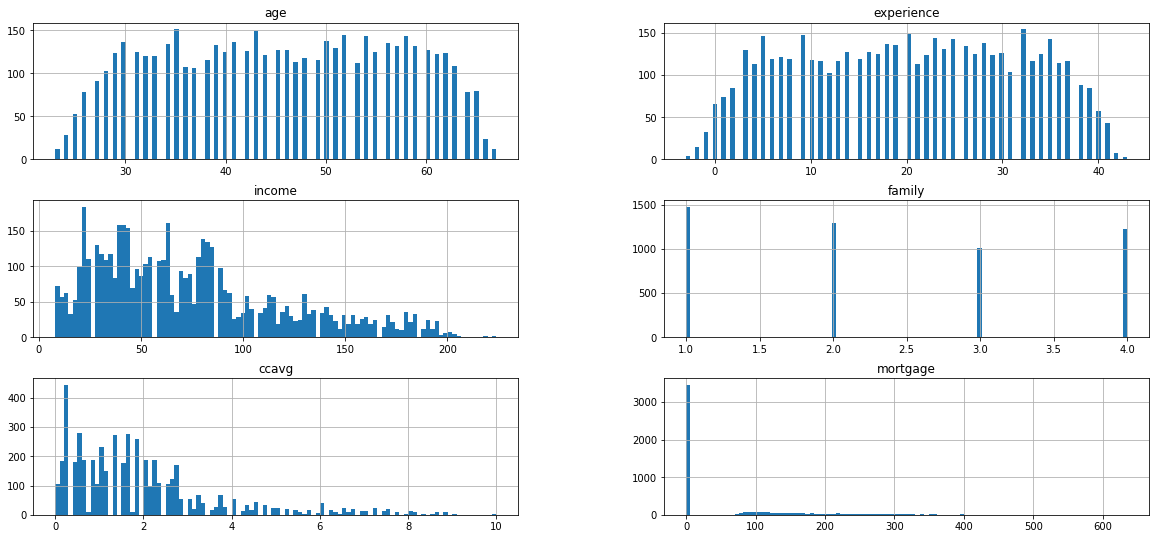

In [1711]:
#Task 2.5-Univariate graph plots
columns = list(bdata)[0:] 
bdata[columns].hist(stacked=False, bins=100, figsize=(20,45), layout=(14,2)); 

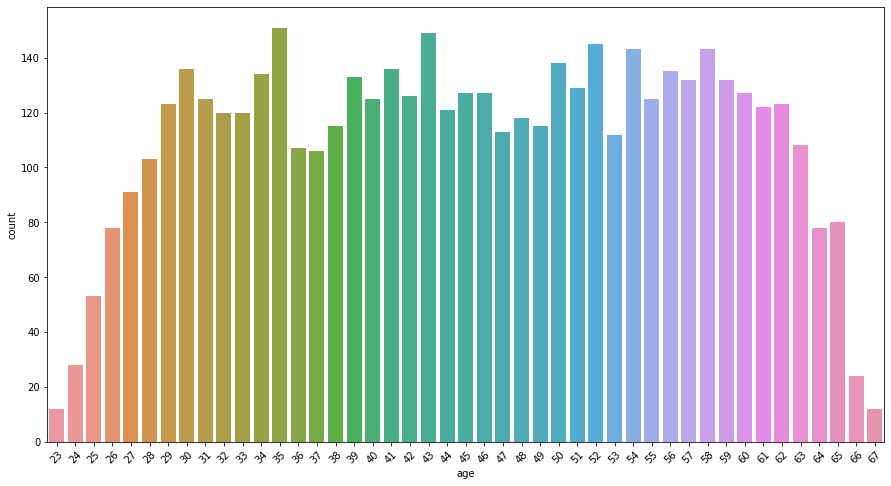

In [1712]:
plt.figure(figsize=(15,8))
sns.countplot(bdata['age'])
plt.xticks(rotation=45)
plt.show()

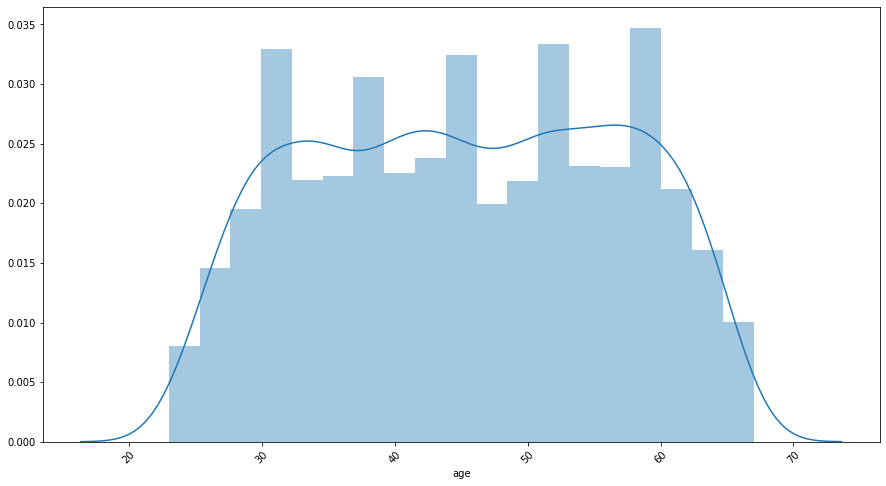

In [1713]:
plt.figure(figsize=(15,8))
sns.distplot(bdata['age'],kde=True)
plt.xticks(rotation=45)
plt.show()

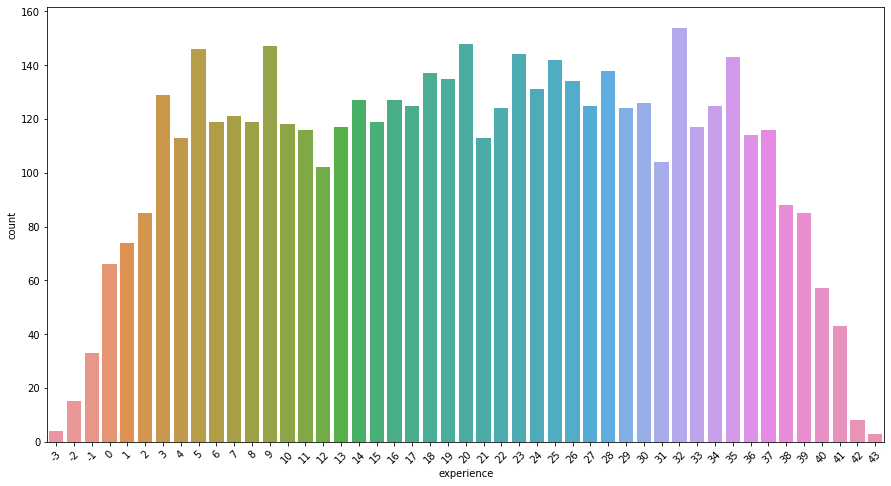

In [1714]:
plt.figure(figsize=(15,8))
sns.countplot(bdata['experience'])
plt.xticks(rotation=45)
plt.show()

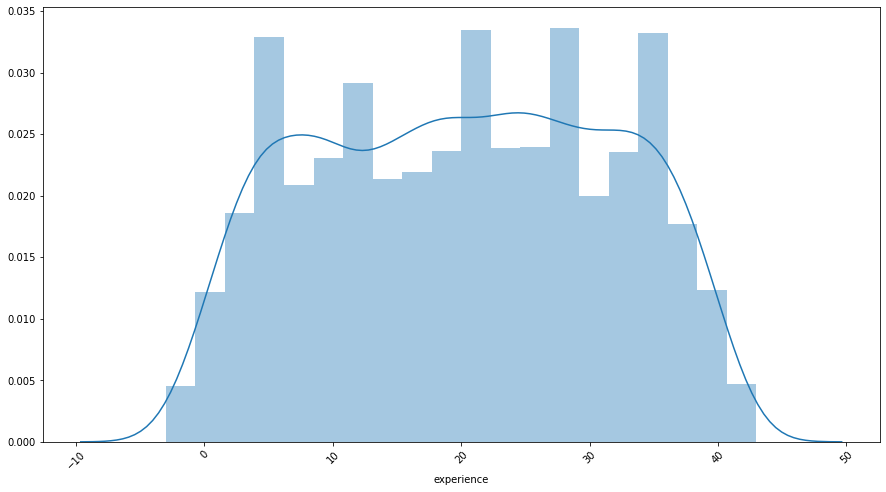

In [1715]:
plt.figure(figsize=(15,8))
sns.distplot(bdata['experience'],kde=True)
plt.xticks(rotation=45)
plt.show()

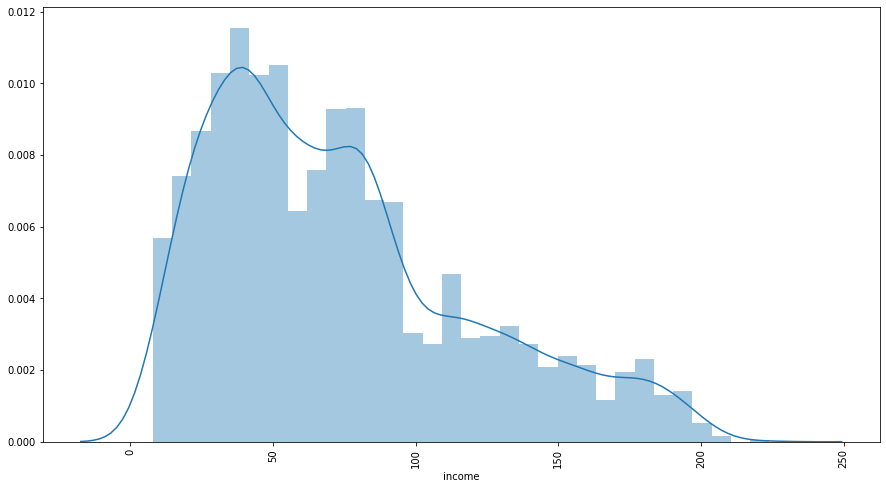

In [1716]:
plt.figure(figsize=(15,8))
sns.distplot(bdata['income'],kde=True)
plt.xticks(rotation=90)
plt.show()

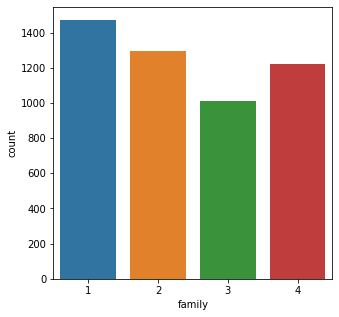

In [1717]:
plt.figure(figsize=(5,5))
sns.countplot(bdata['family'])
plt.show()

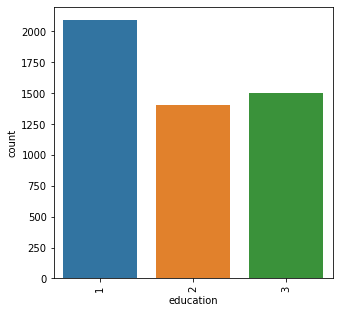

In [1718]:
plt.figure(figsize=(5,5))
sns.countplot(bdata['education'])
plt.xticks(rotation=90)
plt.show()

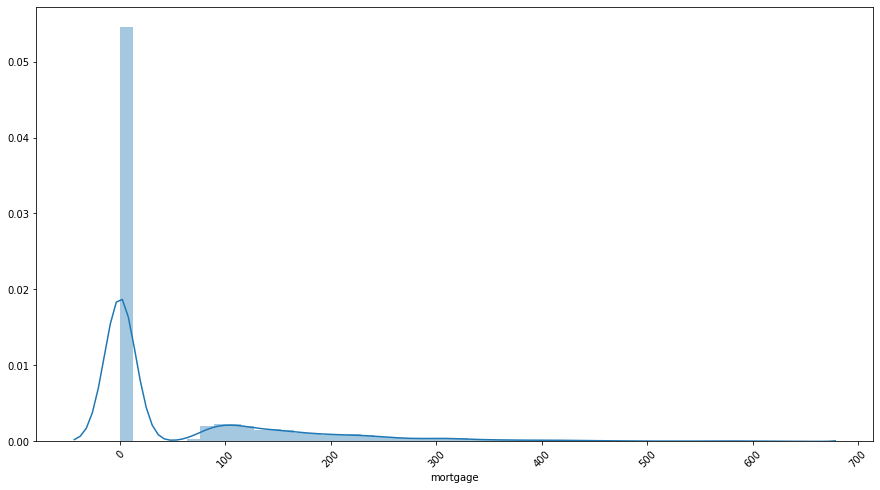

In [1719]:
plt.figure(figsize=(15,8))
sns.distplot(bdata['mortgage'],kde=True)
plt.xticks(rotation=45)
plt.show()

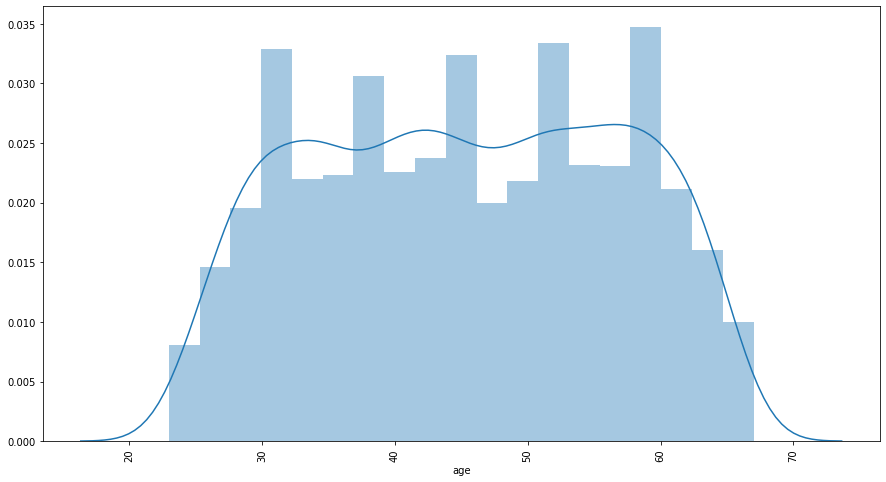

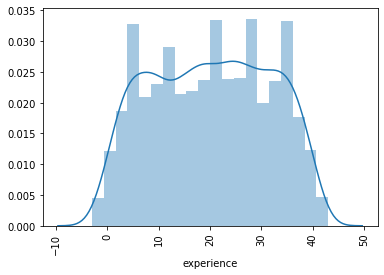

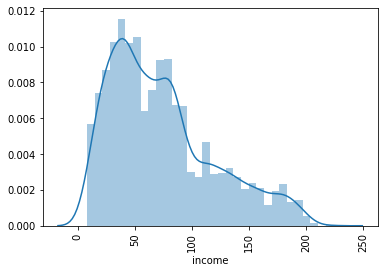

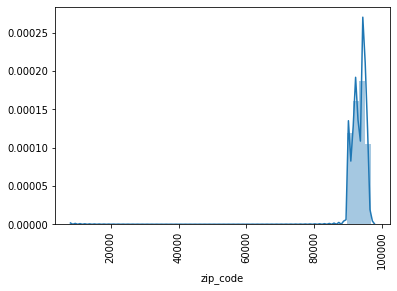

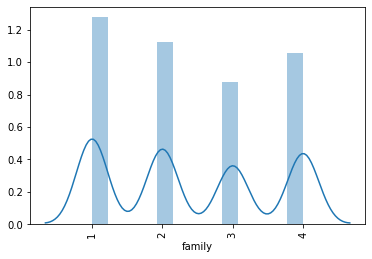

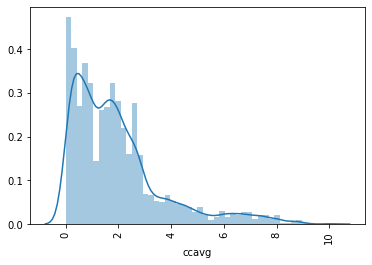

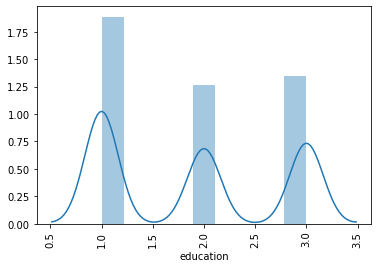

In [1720]:
# distplot for continous columns
plt.figure(figsize=(15,8))
for i in ['age','experience','income','zip_code','family','ccavg','education']:
    sns.distplot(bdata[i])
    plt.xticks(rotation=90)
    plt.show()

## Identify Correlation in data 

In [1721]:
bdata.corr() # It will show correlation matrix 

,age,experience,income,family,ccavg,mortgage
age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,-0.012539
experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,-0.010582
income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,0.206806
family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,-0.020445
ccavg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,0.109905
mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,1.000000


In [1722]:
# Function for correlation
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.xticks(rotation=90)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')


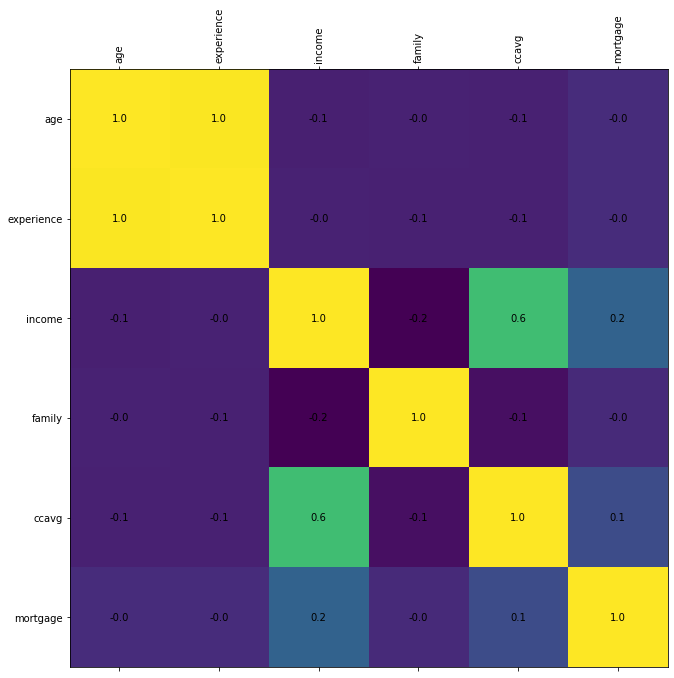

In [1723]:
plot_corr(bdata)

In above plot yellow color represents maximum correlation and blue color represents minimum correlation.
We can see experience and age are correlated. Also there is some correlation between income and ccavg.

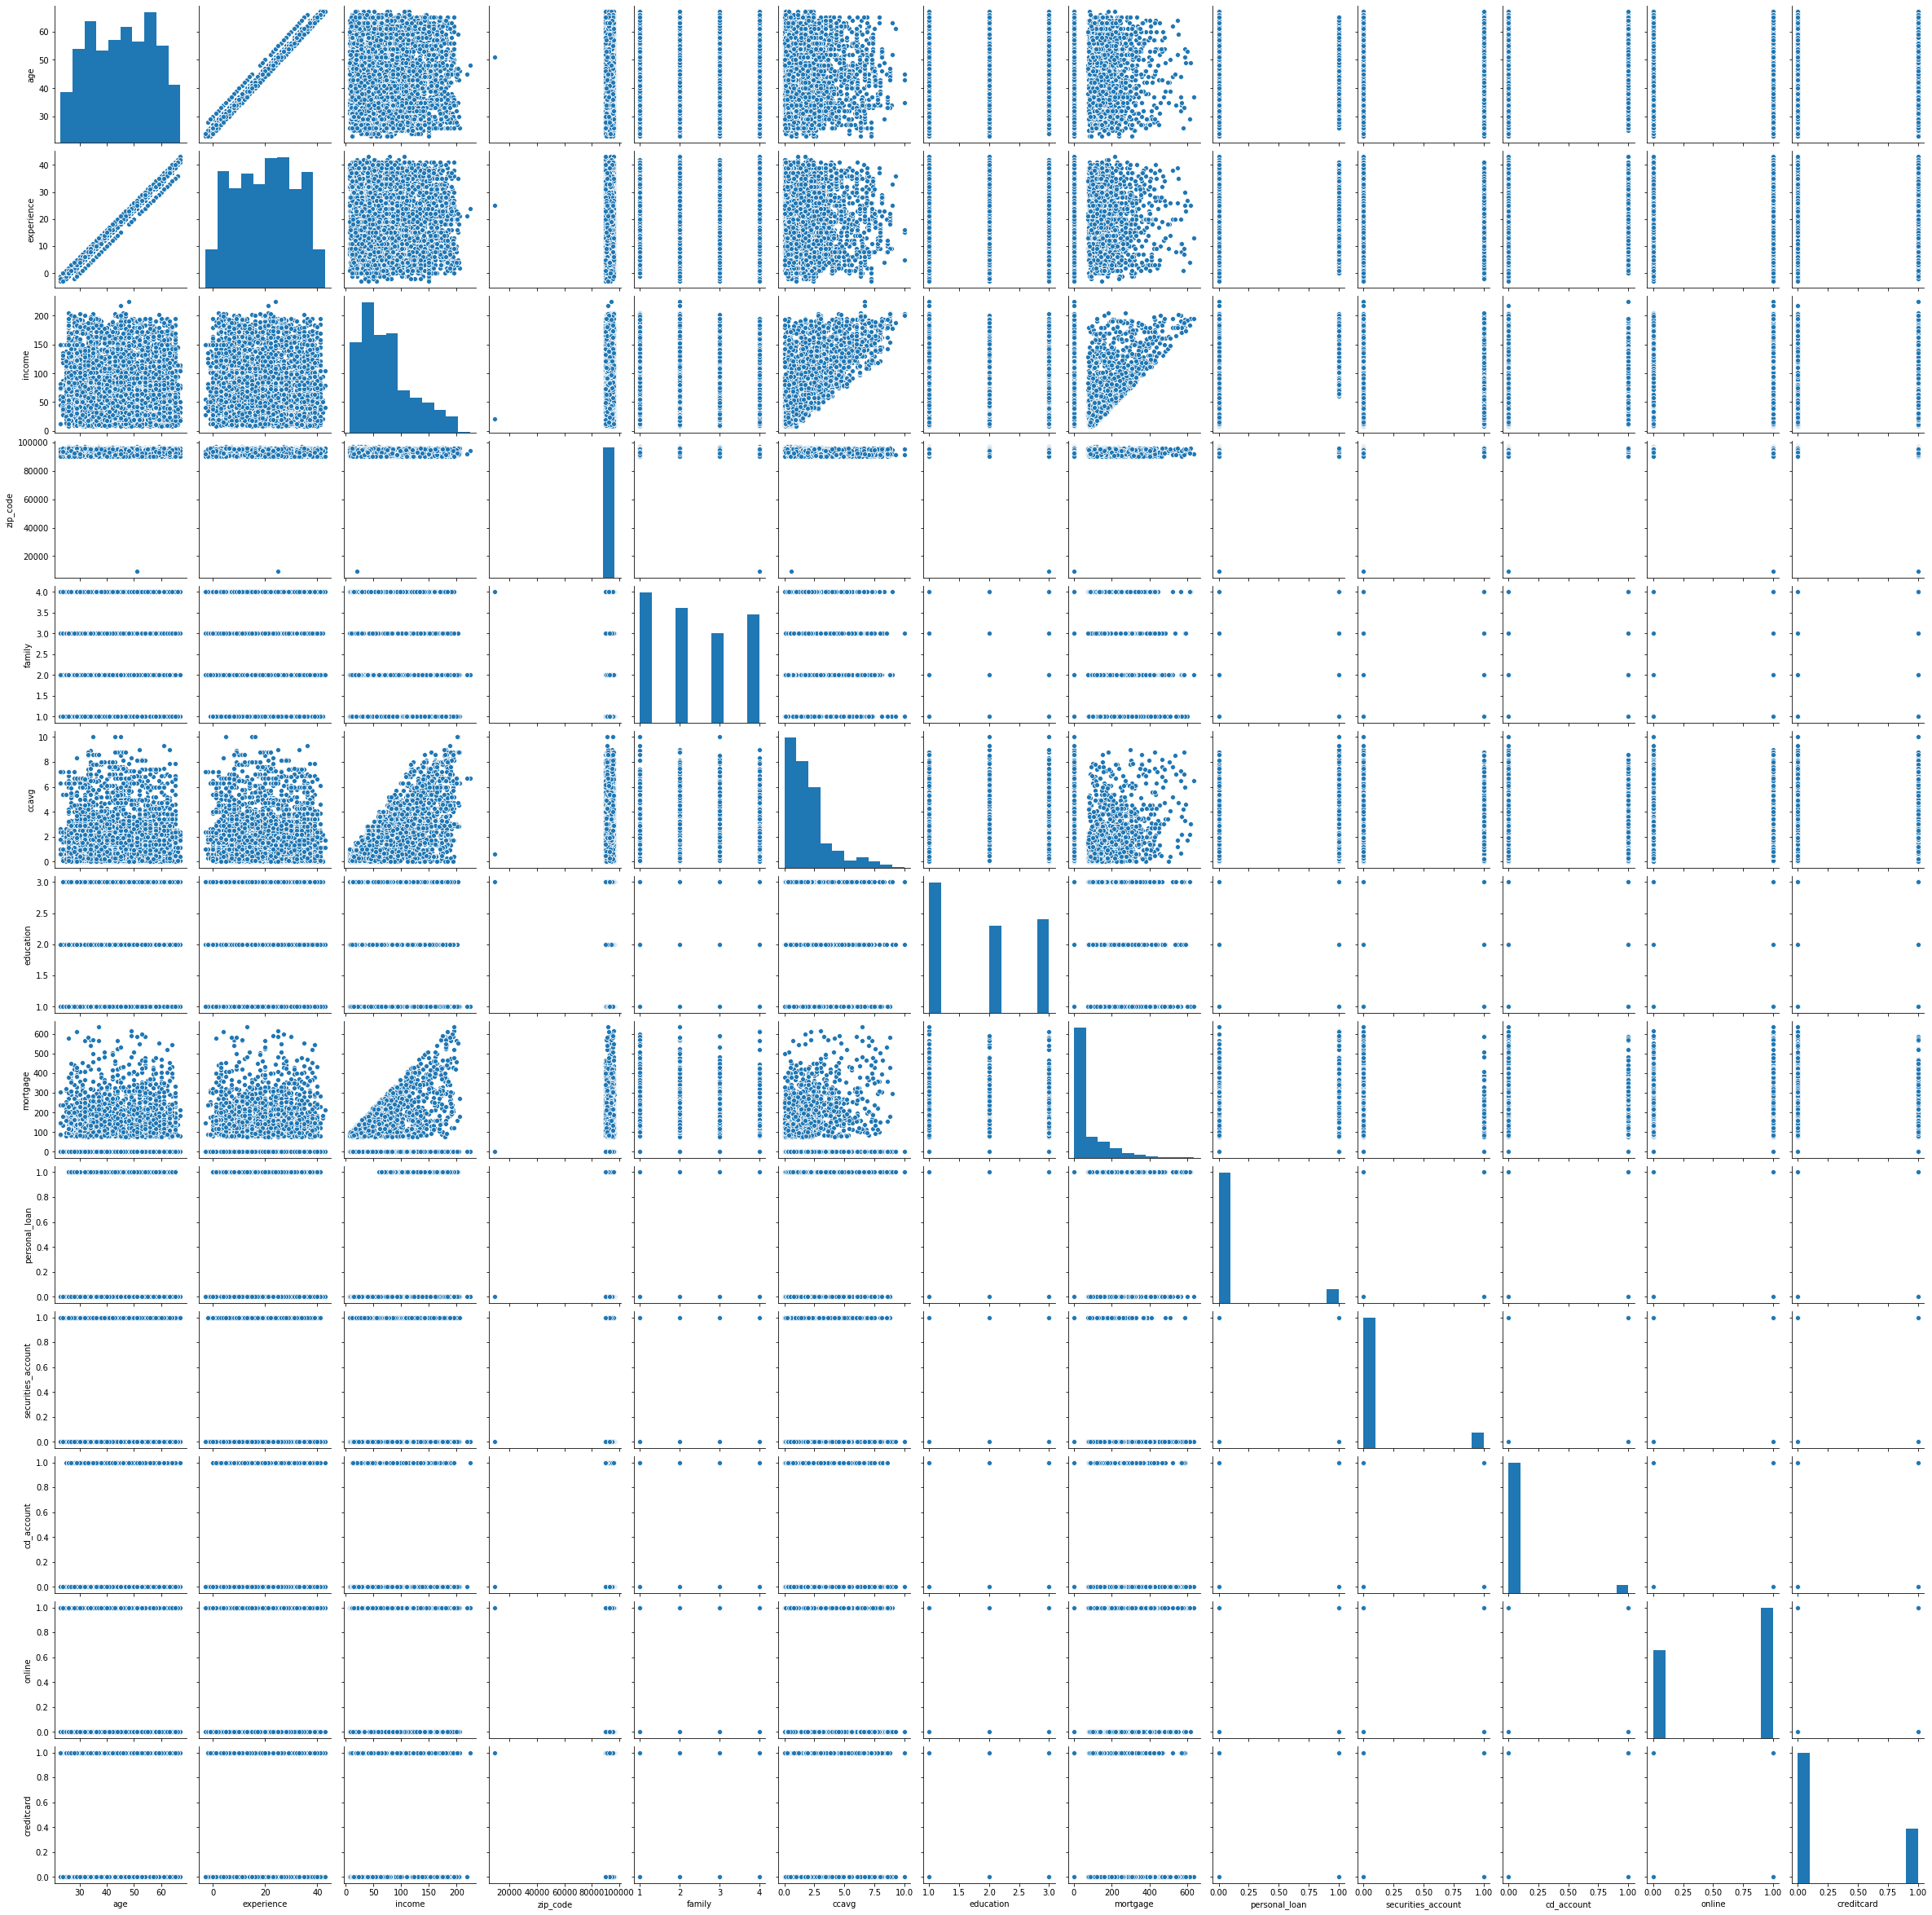

In [1724]:
sns.pairplot(bdata)

In [1725]:
# Let us look at the target column which is 'personal_loan' to understand how the data is distributed amongst 
#the various values
bdata.groupby(["personal_loan"]).mean()

,age,experience,income,family,ccavg,mortgage
personal_loan,,,,,,
0,45.367257,20.132301,66.237389,2.373451,1.729009,51.789381
1,45.066667,19.843750,144.745833,2.612500,3.905354,100.845833


In [1726]:
bdata.groupby(["personal_loan"]).median()

,age,experience,income,family,ccavg,mortgage
personal_loan,,,,,,
0,45.0,20.0,59.0,2.0,1.4,0.0
1,45.0,20.0,142.5,3.0,3.8,0.0


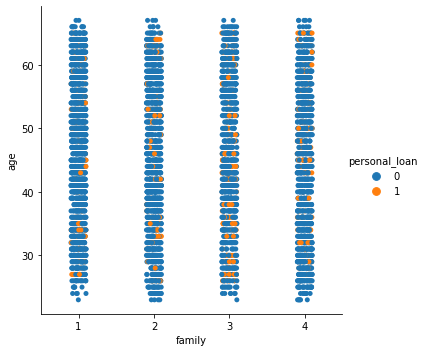

In [1727]:
g = sns.catplot(x="family", y="age", hue="personal_loan", data=bdata)

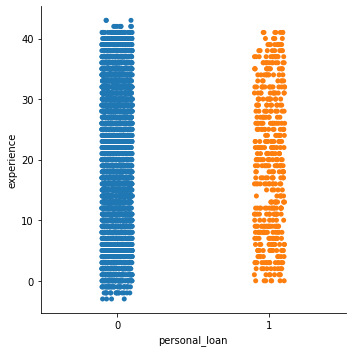

In [1728]:
g = sns.catplot(x="personal_loan", y="experience", data=bdata)

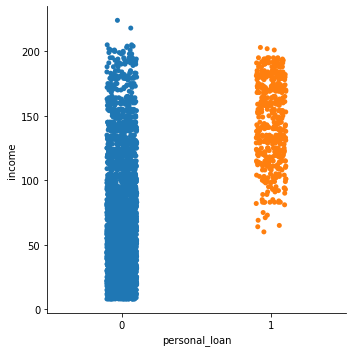

In [1729]:
g = sns.catplot(x="personal_loan", y="income", data=bdata)

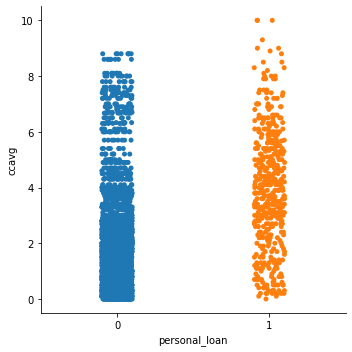

In [1730]:
g = sns.catplot(x="personal_loan", y="ccavg", data=bdata)

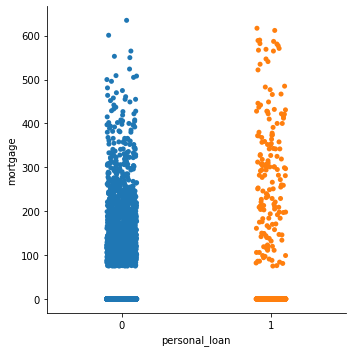

In [1731]:
g = sns.catplot(x="personal_loan", y="mortgage", data=bdata)

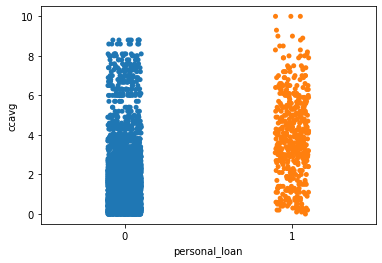

In [1732]:
ax = sns.stripplot(x="personal_loan", y="ccavg", data=bdata)

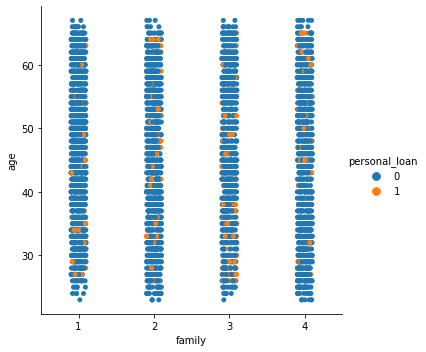

In [1733]:
g = sns.catplot(x="family", y="age", hue="personal_loan", data=bdata)

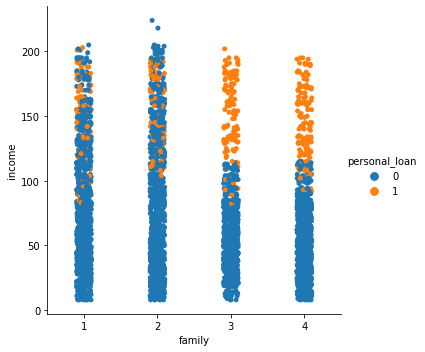

In [1734]:
g = sns.catplot(x="family", y="income", hue="personal_loan", data=bdata)

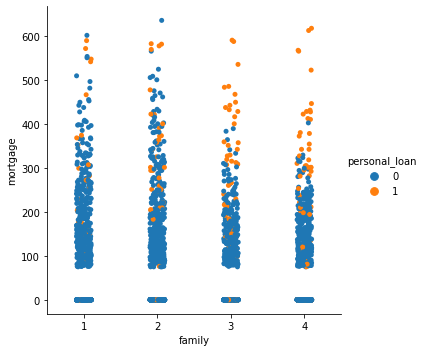

In [1735]:
g = sns.catplot(x="family", y="mortgage", hue="personal_loan", data=bdata)

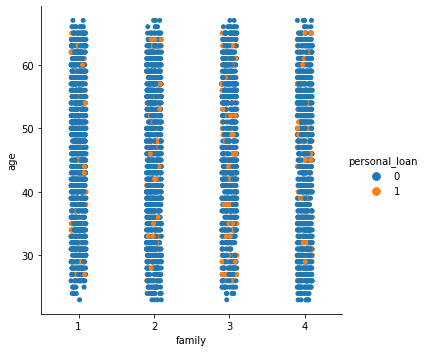

In [1736]:
g = sns.catplot(x="family", y="age", hue="personal_loan", data=bdata)

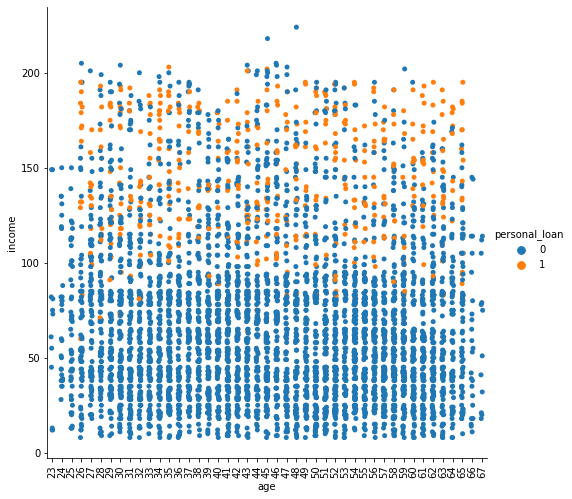

In [1737]:
sns.catplot(x="age", y="income", hue="personal_loan", data=bdata,height=7, aspect=1)
plt.xticks(rotation=90)
plt.show()

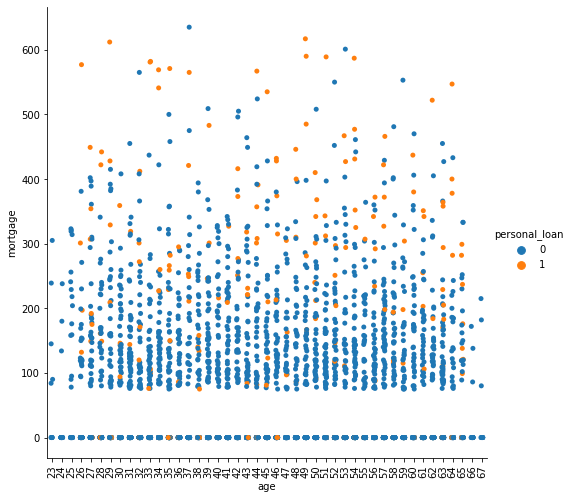

In [1738]:
sns.catplot(x="age", y="mortgage", hue="personal_loan", data=bdata,height=7, aspect=1)
plt.xticks(rotation=90)
plt.show()

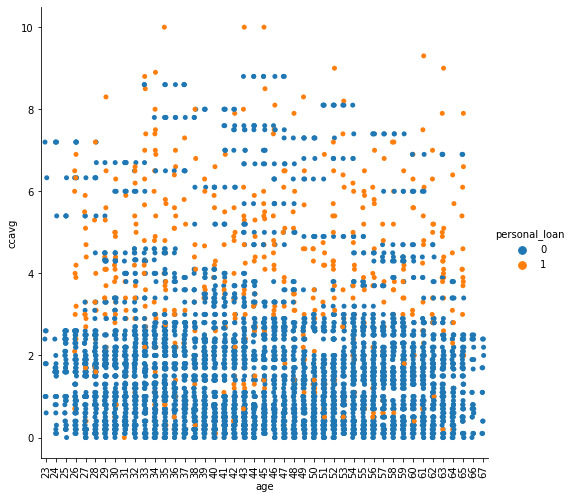

In [1739]:
sns.catplot(x="age", y="ccavg", hue="personal_loan", data=bdata,height=7, aspect=1)
plt.xticks(rotation=90)
plt.show()

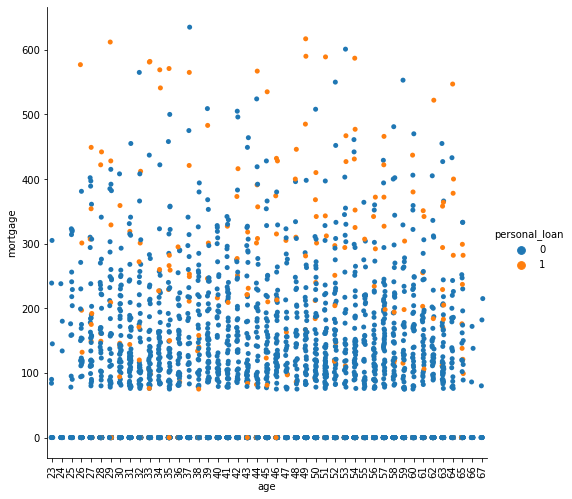

In [1740]:
sns.catplot(x="age", y="mortgage", hue="personal_loan", data=bdata,height=7, aspect=1)
plt.xticks(rotation=90)
plt.show()

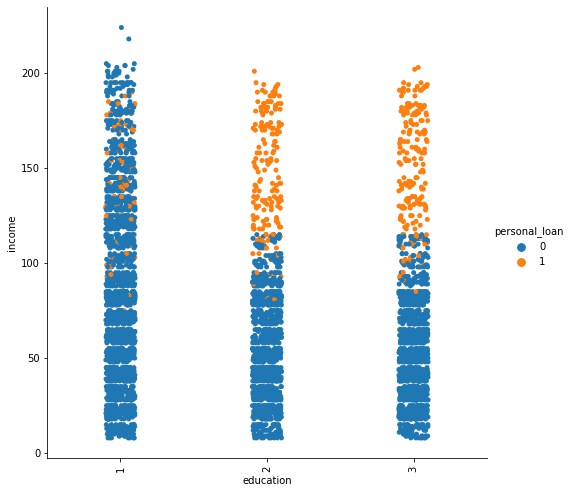

In [1741]:
sns.catplot(x="education", y="income", hue="personal_loan", data=bdata,height=7, aspect=1)
plt.xticks(rotation=90)
plt.show()

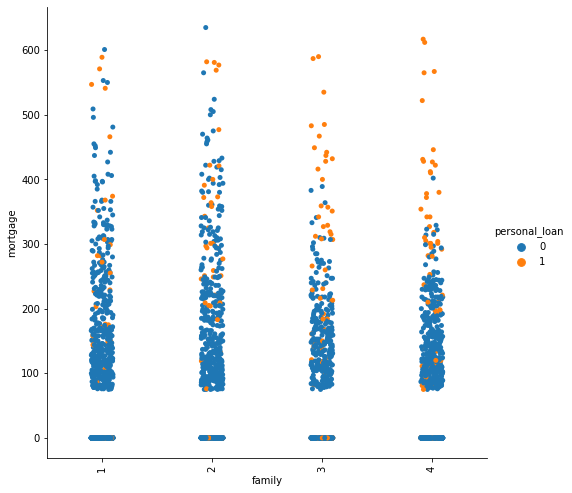

In [1742]:
sns.catplot(x="family", y="mortgage", hue="personal_loan", data=bdata,height=7, aspect=1)
plt.xticks(rotation=90)
plt.show()

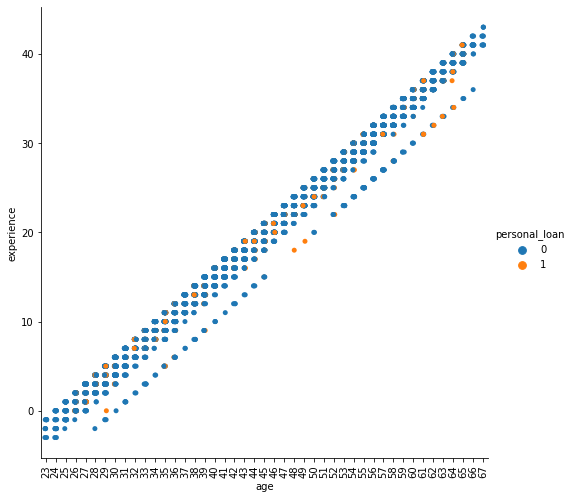

In [1743]:
sns.catplot(x="age", y="experience", hue="personal_loan", data=bdata,height=7, aspect=1)
plt.xticks(rotation=90)
plt.show()

**Insights:**

- People with higher income have taken personal loans

- People with larger mortgage amounts have taken personal loans

- People with higher credit card spending have taken personal loans

- People with higher education and higher income have taken personal loans

- People with larger family and higher income have taken personal loans

In [1744]:
pd.crosstab(bdata['age'],bdata['personal_loan'],normalize='index')

personal_loan,0,1
age,,
23,1.000000,0.000000
24,1.000000,0.000000
25,1.000000,0.000000
26,0.833333,0.166667
27,0.868132,0.131868
28,0.912621,0.087379
29,0.878049,0.121951
30,0.875000,0.125000
31,0.944000,0.056000


In [1745]:
pd.crosstab(bdata['experience'],bdata['personal_loan'],normalize='index')

personal_loan,0,1
experience,,
-3,1.000000,0.000000
-2,1.000000,0.000000
-1,1.000000,0.000000
0,0.893939,0.106061
1,0.891892,0.108108
2,0.894118,0.105882
3,0.868217,0.131783
4,0.920354,0.079646
5,0.904110,0.095890


In [1746]:
pd.crosstab(bdata['income'],bdata['personal_loan'],normalize='index')

personal_loan,0,1
income,,
8,1.0,0.0
9,1.0,0.0
10,1.0,0.0
11,1.0,0.0
12,1.0,0.0
...,...,...
203,0.5,0.5
204,1.0,0.0
205,1.0,0.0


In [1747]:
pd.crosstab(bdata['zip_code'],bdata['personal_loan'],normalize='index')

personal_loan,0,1
zip_code,,
9307,1.0,0.0
90005,1.0,0.0
90007,1.0,0.0
90009,1.0,0.0
90011,1.0,0.0
...,...,...
96091,1.0,0.0
96094,1.0,0.0
96145,1.0,0.0


In [1748]:
#Drawing relationships in data
bdata.groupby(['personal_loan','family','education'])['online'].value_counts()

personal_loan  family  education  online
0              1       1          1         395
                                  0         274
                       2          1         175
                                  0         111
                       3          1         245
                                  0         165
               2       1          1         389
                                  0         264
                       2          1         115
                                  0         100
                       3          1         180
                                  0         142
               3       1          1         187
                                  0         122
                       2          1         204
                                  0         135
                       3          1         138
                                  0          91
               4       1          1         233
                                  0         139

In [1749]:
#Drawing relationships in data
bdata.groupby(['personal_loan','family','education'])['creditcard'].value_counts()

personal_loan  family  education  creditcard
0              1       1          0             487
                                  1             182
                       2          0             200
                                  1              86
                       3          0             298
                                  1             112
               2       1          0             452
                                  1             201
                       2          0             139
                                  1              76
                       3          0             224
                                  1              98
               3       1          0             218
                                  1              91
                       2          0             255
                                  1              84
                       3          0             153
                                  1              76
               4   

In [1750]:
#Drawing relationships in data
bdata.groupby(['personal_loan','family','education'])['cd_account'].value_counts()

personal_loan  family  education  cd_account
0              1       1          0             645
                                  1              24
                       2          0             275
                                  1              11
                       3          0             398
                                  1              12
               2       1          0             624
                                  1              29
                       2          0             209
                                  1               6
                       3          0             311
                                  1              11
               3       1          0             292
                                  1              17
                       2          0             330
                                  1               9
                       3          0             218
                                  1              11
               4   

In [1751]:
bdata.groupby(['personal_loan','family','education'])['securities_account'].value_counts()

personal_loan  family  education  securities_account
0              1       1          0                     613
                                  1                      56
                       2          0                     253
                                  1                      33
                       3          0                     378
                                  1                      32
               2       1          0                     583
                                  1                      70
                       2          0                     191
                                  1                      24
                       3          0                     291
                                  1                      31
               3       1          0                     272
                                  1                      37
                       2          0                     314
                                  1            

**Task 2.6 - Get data model ready**

- Data Preparation

- Check hidden missing or incorrect values 

As we checked missing values earlier but we did not find any values missing. However we found negative values in experience column. We have few options as explained below.

### Experience column has negative values like -1,-2,-3

In [1752]:
#Experience column data has problem where numbers like -1, -2, -3 exist
#options - 

#1 - change -ve values to +ve thinking -ve sign was typo (using this option 
#based on suggestion by Great Learning response to the question posed in this project discussion forum)

#2 - replace the negative numbers by mean experience

#3 - Drop the column experience as it does not seem relevant

# switch the -ve values in experience column to positive values as these values seem typos and 
#the values that are negative seems that similar positive values do exist in the dataset  
#(using this option #based on suggestion by Great Learning response to the question posed in this project discussion forum)
bdata['experience'] = bdata['experience'].abs()

In [1753]:
bdata.head(10)

,age,experience,income,zip_code,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


- Define X and Y variables

In [1754]:
#Define X and Y variables
X = bdata.drop('personal_loan',axis=1)

Y = bdata['personal_loan']

## Task 3 - Split the data into training and test set in the ratio of 70:30 respectively
We will use 70% of data for training and 30% for testing.

In [1755]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

X_train.head()

,age,experience,income,zip_code,family,ccavg,education,mortgage,securities_account,cd_account,online,creditcard
717,59,34,94,93940,3,0.5,1,0,0,0,0,1
2496,63,37,32,93117,3,0.7,2,141,0,0,0,0
2469,43,18,89,92780,1,0.1,2,307,0,0,0,1
1375,50,26,179,92612,1,2.9,3,0,0,0,0,1
2742,39,14,89,95762,2,0.4,1,0,0,0,1,0


Lets check split of data

In [1756]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(bdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(bdata.index)) * 100))

70.00% data is in training set
30.00% data is in test set


Now lets check Personal Loan True/False ratio in split data 

In [1757]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(bdata.loc[bdata['personal_loan'] == 1]), (len(bdata.loc[bdata['personal_loan'] == 1])/len(bdata.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(bdata.loc[bdata['personal_loan'] == 0]), (len(bdata.loc[bdata['personal_loan'] == 0])/len(bdata.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 342 (9.77%)
Training Personal Loan False Values   : 3158 (90.23%)

Test Personal Loan True Values        : 138 (9.20%)
Test Personal Loan False Values       : 1362 (90.80%)



## Task 4 - Use Logistic Regression model to predict whether the customer will take personal loan or not. Print all the metrics related for evaluating the model performance

In [1758]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

#logreg = LogisticRegression(random_state=7, class_weight='balanced')
logreg = LogisticRegression(random_state=7)
logreg.fit(X_train, y_train)                    # fit the model on train data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1759]:
#predict on test
y_predict = logreg.predict(X_test)

In [1760]:
coef_df = pd.DataFrame(logreg.coef_)
coef_df['intercept'] = logreg.intercept_
print(coef_df)

          0         1         2         3         4        5         6  \
0  0.000061  0.000044  0.034562 -0.000063  0.000165  0.00104  0.000254   

          7         8         9        10        11     intercept  
0  0.000902  0.000024  0.000132  0.000005  0.000002 -8.044715e-07  


In [1761]:
# Observe the predicted and observed classes in a dataframe.

z = X_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
z.head(10)

,age,experience,income,zip_code,family,ccavg,education,mortgage,securities_account,cd_account,online,creditcard,Observed Loan Status,Predicted Loan Status
3406,42,12,34,92177,3,2.0,3,0,0,0,0,1,0,0
757,52,28,81,91745,3,1.8,2,0,1,0,0,0,0,0
3624,58,28,70,92028,1,1.4,3,0,0,0,0,0,0,0
4544,28,4,80,95819,3,2.5,1,0,0,0,1,0,0,0
3235,60,35,39,91711,2,1.6,3,0,0,0,1,0,0,0
1868,25,1,118,92833,1,5.4,1,0,0,0,1,1,0,0
2916,46,20,40,92037,1,1.2,2,0,0,0,1,0,0,0
3335,35,10,118,92069,2,7.8,1,358,0,0,0,0,0,0
3527,35,10,24,95054,4,1.1,3,0,0,0,0,0,0,0
2827,37,11,84,90266,4,2.2,2,0,0,0,1,1,0,0


In [1762]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

METRICS RELATED TO MODEL PERFORMANCE
Trainig accuracy 0.9042857142857142

Testing accuracy 0.9153333333333333

Confusion Matrix


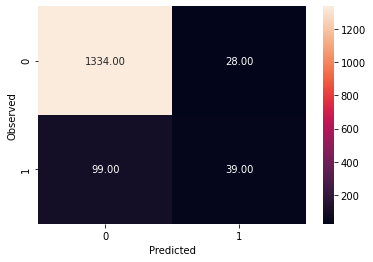

None

Recall: 0.2826086956521739

Precision: 0.582089552238806

F1 Score: 0.38048780487804873

Roc Auc Score: 0.6310253463576582


In [1763]:
print("===============================================================") 
print("METRICS RELATED TO MODEL PERFORMANCE") 
print("===============================================================") 
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

## Task 5 - Check different parameters of Logistic Regression and give your reasoning whether the model performance is affected due to it or not?

In [1764]:
#Task 5

# Checking Parameters of logistic regression
logreg.get_params()

#If we dont specify the parameters in the model it takes default value

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [1765]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.949, 0.904, 0.905, 0.902, 0.902]

[0.955, 0.915, 0.918, 0.908, 0.908]


In [1766]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.949, 0.902]

[0.955, 0.908]


**Insights:**
- `Highest accuracy is 'l1' with 'liblinear' and 'l2' with newton-cg. Any of these two can be used in final model.`


In [1767]:
#We will use the 'l1' with 'liblinear' model as final model

model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear')

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))

Trainig accuracy 0.9497142857142857

Testing accuracy 0.9553333333333334


**Insights:**
- `Training and Testing accuracy increased from first model execution`

In [1768]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.925, 0.947, 0.948, 0.948, 0.949, 0.95]

[0.939, 0.953, 0.953, 0.955, 0.955, 0.955]


**Insights:**
- `Training and Testing accuracy is highest with C=1`

METRICS RELATED TO MODEL PERFORMANCE
Trainig accuracy 0.9497142857142857

Testing accuracy 0.9553333333333334

Confusion Matrix


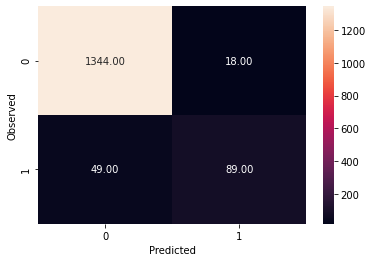

None

Recall: 0.644927536231884

Precision: 0.8317757009345794

F1 Score: 0.726530612244898

Roc Auc Score: 0.8158558386005235


In [1769]:
#Therefore final model is liblinear with l1 and C=1
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',C=1) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("===============================================================") 
print("METRICS RELATED TO MODEL PERFORMANCE") 
print("===============================================================") 
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

**Insights:**
- `Training and Testing accuracy along with precision, F1 score and ROC Auc Score is marginally better in 'l1' with 'liblinear' and C=1 option compared to 'l2' with newton-cg and C=1. Hence liblinear was used as solver in the final model.`

## Task 5 Conclusion:

**Task 5 Conclusion:**
There is significant improvement in the model performance based on adjustement in model parameters.

**First execution with default parameters**

- Trainig accuracy 0.9042857142857142

- Testing accuracy 0.9153333333333333

- Recall: 0.2826086956521739

- Precision: 0.582089552238806

- F1 Score: 0.38048780487804873

- Roc Auc Score: 0.6310253463576582

**Final execution with improved parameters based on various adjustments**

- Trainig accuracy 0.9497142857142857

- Testing accuracy 0.9553333333333334

- Recall: 0.644927536231884

- Precision: 0.8317757009345794

- F1 Score: 0.726530612244898

- Roc Auc Score: 0.8158558386005235

## Task 6 - Give Business understanding of your model?

**Confusion matrix results description**

**True Positive (observed=1,predicted=1) 89 customers:**

Predicted that the customer did accept personal loan offered and based on last campaign data the customer did accept the personal loan offered. This group of customers are the correct target and bank will be able to take advantage of this model to target their campaign towards the right customer.

**False Positive (observed=0,predicted=1) 18 customers:**

Predicted that the customer did accept personal loan offered and based on last campaign data the customer did not accept the personal loan offered. This will be the additional expense for the marketing department where they will send the offer to these 18 customers who will not accept the loan offer.

**True Negative (observed=0,predicted=0):1344 customers**

Predicted that the customer did not accept personal loan offered and based on last campaign data the customer did not accept the personal loan offered. This correct prediction will enable the bank to save expenses incurred in marketing to the customers where there is no chance of acceptance.


**False Negative (observed=1,predicted=0) 49 customers:**

Predicted that the customer did not accept personal loan offered and based on last campaign data the customer did accept the personal loan offered. This prediction is resulting in not targeting the customers who were seen to be accepting the loan offered. This means the loss of potential revenue for the bank. 

The bank wants to target the right customers by offering the loan to the people by creating a model developed by studying the customers who accepted the personal loan in last campaign i.e. **less number of False Positive**, if FP is high there is a chance that bank offers the personal loans to customers who will not accept the personal loan resulting in spending the money in marketing efforts that will have no potential returns. So in the final model we have to make sure there are least false positive predictions. Hence **Precision is the important metric**.

In case of false negative bank will lose few customers but that's okay because the bank is not incurring extra cost in this case and retaining that capital to be used for other purposes.

After achieving the desired accuracy we can deploy the model for practical use. The bank now can predict who will accept the personal loan and send the offers accordingly to maximize the acceptance by targeting the right customers and maximizing the cost benefit of the personal loan campaign. They can use the model for upcoming new customers or existing customers to find the group of customers that can be targeted for personal loan campaign.